In [28]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load the data 

In [29]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
images = np.asarray(data.data)
labels = data.target.astype(int)


## Add noise and train the model to reconstruct the clean image 

In [30]:
# Normalize
X = images / 255.0

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [31]:
noise_factor = 0.3

X_train_noisy = X_train + noise_factor * np.random.normal(0,1,X_train.shape)
X_test_noisy  = X_test  + noise_factor * np.random.normal(0,1,X_test.shape)

X_train_noisy = np.clip(X_train_noisy,0.,1.)
X_test_noisy  = np.clip(X_test_noisy,0.,1.)


In [32]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train_noisy, X_train)

# Predict clean images
denoised_images = knn_model.predict(X_test_noisy)


In [33]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression Model

lin_model = LinearRegression()
lin_model.fit(X_train_noisy, X_train)

# Predict clean images
denoised_images_lin = lin_model.predict(X_test_noisy)

## Evaluate the model performance 

In [34]:

mse  = mean_squared_error(X_test, denoised_images)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(X_test, denoised_images)
r2   = r2_score(X_test, denoised_images)

print("Model Performance for KNeighborsRegressor :")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R2   : {r2:.4f}")


Model Performance for KNeighborsRegressor :
MSE  : 0.018568
RMSE : 0.136265
MAE  : 0.047681
R2   : 0.4468


In [35]:
mse  = mean_squared_error(X_test, denoised_images_lin)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(X_test, denoised_images_lin)
r2   = r2_score(X_test, denoised_images_lin)

print("Model Performance for Linear Regression Model:")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R2   : {r2:.4f}")


Model Performance for Linear Regression Model:
MSE  : 0.010258
RMSE : 0.101281
MAE  : 0.058020
R2   : 0.5524




**KNeighborsRegressor** achieved acceptable results, indicating that it can reduce noise by relying on similarity between images. 


the **Linear Regression** model achieved better  performance. The lower MSE and RMSE  more accurate reconstruction, while the higher R² score shows that the model explains a larger portion of the variance in clean images.

the results indicate that Linear Regression provides a more consistent reconstruction compared to KNN

## Plot and predict the clean image

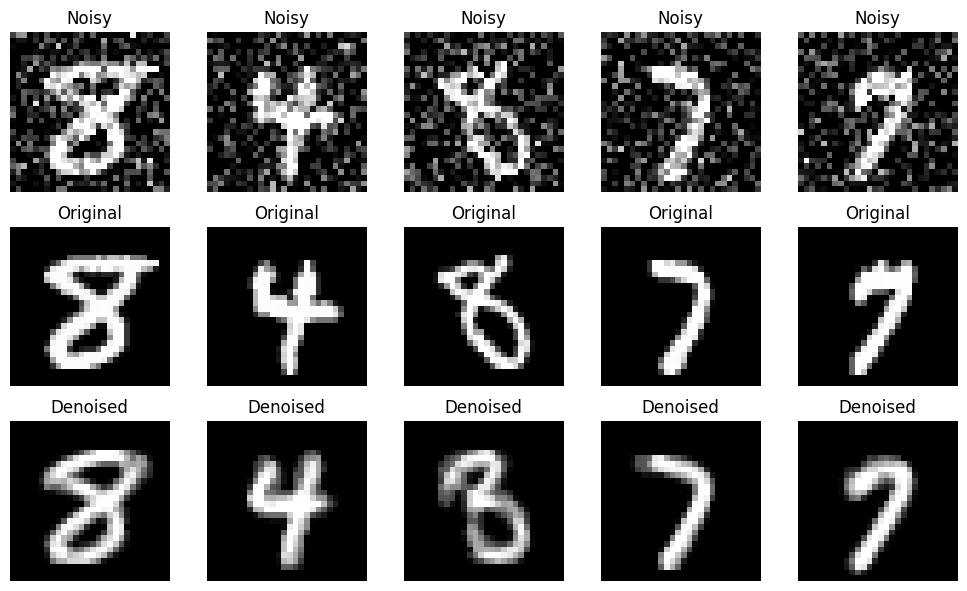

In [36]:
def plot_results(noisy, clean, reconstructed, n=5):
    plt.figure(figsize=(10,6))

    for i in range(n):

        plt.subplot(3, n, i+1)
        plt.imshow(noisy[i].reshape(28,28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        plt.subplot(3, n, i+1+n)
        plt.imshow(clean[i].reshape(28,28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(3, n, i+1+2*n)
        plt.imshow(reconstructed[i].reshape(28,28), cmap='gray')
        plt.title("Denoised")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_results(X_test_noisy, X_test, denoised_images)

Model Performance for Linear Regression Model:


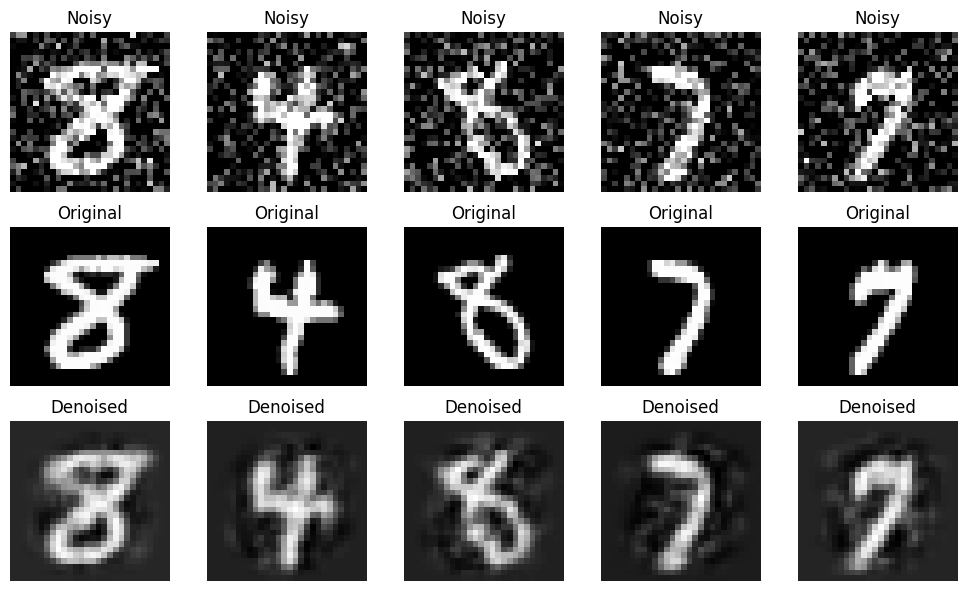

In [37]:
# 
print("Model Performance for Linear Regression Model:")

plot_results(X_test_noisy, X_test, denoised_images_lin)